# HouseSales Prediction - KC House Data - TensorFlow

- [DataSet link](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [73]:
data= pd.read_csv("../DATA/kc_house_data.csv")
data.drop(columns=["id"], inplace=True)
data.date= pd.to_datetime(data.date,infer_datetime_format=True)
data['month']= data.date.apply(lambda x: x.month)
# data['year']= data.date.apply(lambda x: x.year)  # since 2 values are there.. not much help
data.drop(columns=["date"], inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [75]:
data.nunique()

price            3622
bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
floors              6
waterfront          2
view                5
condition           5
grade              11
sqft_above        942
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
month              12
dtype: int64

<AxesSubplot:>

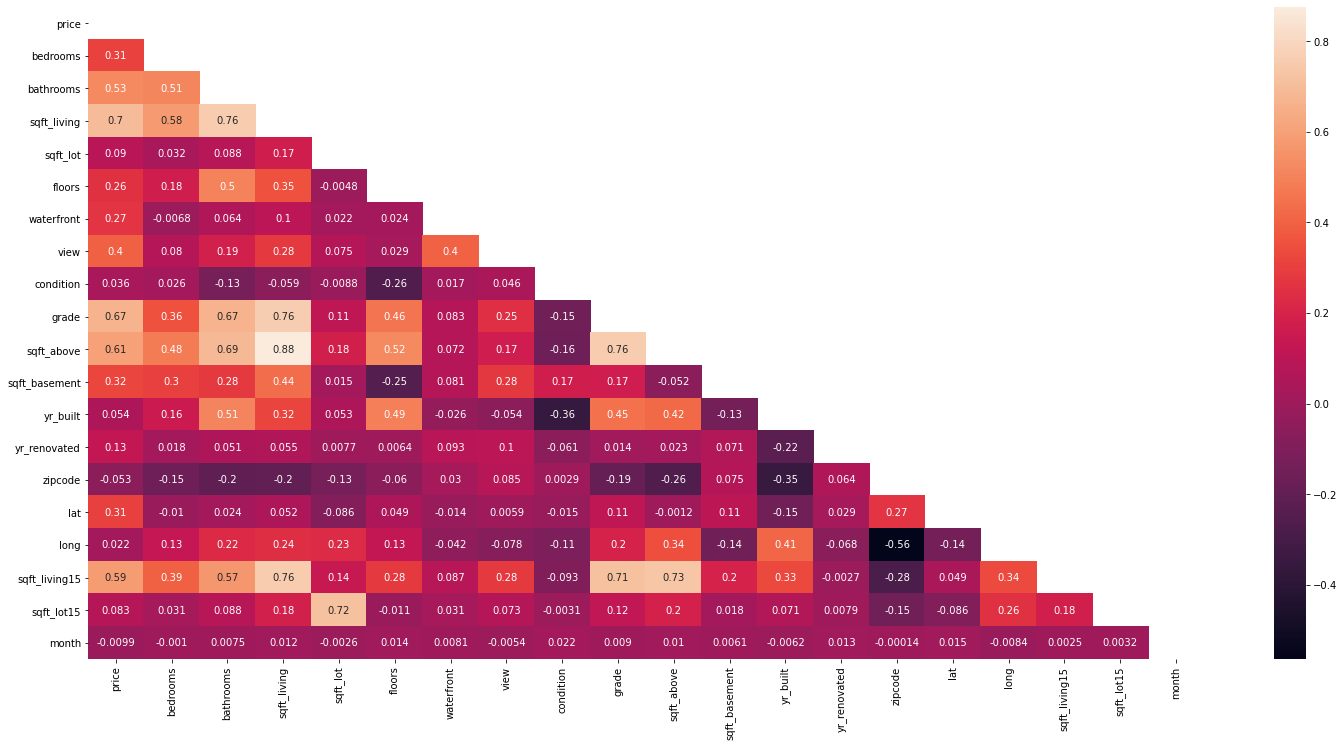

In [76]:
mat= data.corr()
plt.figure(figsize=(25,12))
sns.heatmap(mat, mask= np.triu(mat), annot=True, fmt=".2g")

In [247]:
price_corr[price_corr < 0.1]

sqft_lot      0.089876
condition     0.036056
yr_built      0.053953
zipcode      -0.053402
long          0.022036
sqft_lot15    0.082845
month        -0.009928
Name: price, dtype: float64

In [77]:
price_corr= mat.iloc[0,1:]
cols= price_corr[price_corr > 0.1].index
cols # from 19, 12 got selected

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat',
       'sqft_living15'],
      dtype='object')

In [78]:
new_data= data[cols].copy()
new_data.loc[:,"price"]= data.price
new_data.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,price
0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340,221900.0
1,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690,538000.0
2,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720,180000.0
3,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360,604000.0
4,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800,510000.0


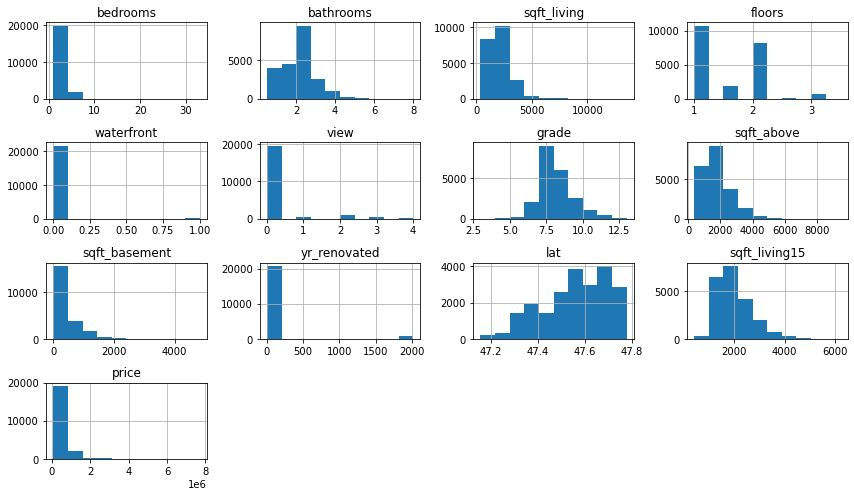

In [79]:
new_data.hist(figsize=(12,7))
plt.tight_layout()

In [80]:
new_data.describe()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,price
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.494096,0.007547,0.234292,7.657915,1788.596842,291.725008,84.464787,47.560093,1986.620318,5.402966e+05
std,0.926299,0.768984,918.106125,0.539683,0.086549,0.766390,1.173200,827.759761,442.667800,401.821438,0.138552,685.230472,3.673681e+05
min,1.000000,0.500000,370.000000,1.000000,0.000000,0.000000,3.000000,370.000000,0.000000,0.000000,47.155900,399.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,0.000000,47.471100,1490.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,0.000000,47.571800,1840.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,8.000000,2210.000000,560.000000,0.000000,47.678000,2360.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,6210.000000,7.700000e+06


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

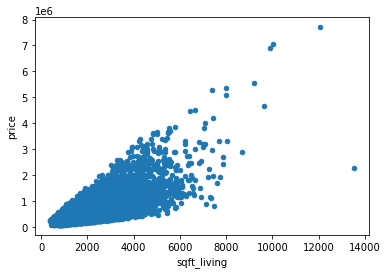

In [81]:
new_data.plot(kind="scatter", y="price", x="sqft_living")

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

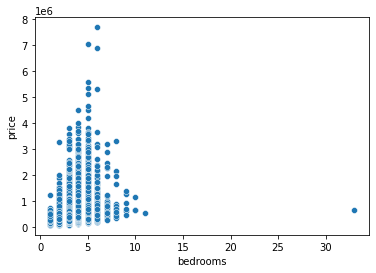

In [82]:
sns.scatterplot(x="bedrooms",y="price", data=new_data)

<AxesSubplot:>

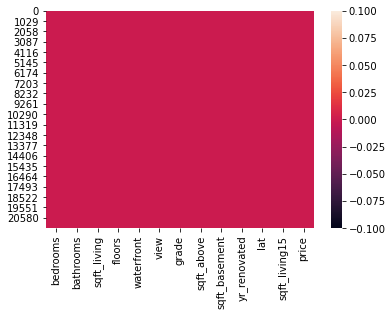

In [83]:
sns.heatmap(new_data.isnull())

In [84]:
x= new_data.drop(labels="price", axis=1)
y= new_data.price

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [87]:
from sklearn.preprocessing import MinMaxScaler as scaler

sc= scaler()

x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

# sc2= scaler()

# y_train= sc2.fit_transform(y_train.to_frame()).ravel()
# y_test= sc2.transform(y_test.to_frame()).ravel()

In [88]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17277, 12), (4320, 12), (17277,), (4320,))

## Model - 1

In [90]:
tf.random.set_seed(42)

model1= keras.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=(12,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1,)
], name="model1")

model1.compile(optimizer=keras.optimizers.Adam(0.001), loss="mean_squared_error")

callback= keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, min_delta=0.2, mode="min")

hist1= model1.fit(x_train, y_train, epochs=200, validation_split=0.2, batch_size=128)

Epoch 1/200
108/108 [==============================] - 1s 5ms/step - loss: 432344432640.0000 - val_loss: 394034380800.0000
Epoch 2/200
108/108 [==============================] - 0s 3ms/step - loss: 241895145472.0000 - val_loss: 71309312000.0000
Epoch 3/200
108/108 [==============================] - 0s 3ms/step - loss: 82352463872.0000 - val_loss: 66107756544.0000
Epoch 4/200
108/108 [==============================] - 1s 5ms/step - loss: 77597540352.0000 - val_loss: 62373228544.0000
Epoch 5/200
108/108 [==============================] - 0s 4ms/step - loss: 74091192320.0000 - val_loss: 59258036224.0000
Epoch 6/200
108/108 [==============================] - 0s 4ms/step - loss: 70328377344.0000 - val_loss: 56525131776.0000
Epoch 7/200
108/108 [==============================] - 0s 4ms/step - loss: 65809899520.0000 - val_loss: 53529759744.0000
Epoch 8/200
108/108 [==============================] - 0s 4ms/step - loss: 62678536192.0000 - val_loss: 51450482688.0000
Epoch 9/200
108/108 [========

<AxesSubplot:>

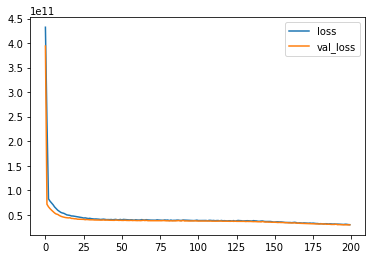

In [91]:
pd.DataFrame(hist1.history).plot()

In [92]:
preds= model1.predict(x_test)

from sklearn.metrics import r2_score

r2_score(y_test, preds)

0.7936971240714373

In [20]:
model1.evaluate(x_test,y_test)

203/203 [==============================] - 0s 2ms/step - loss: 34015350784.0000


34015350784.0

## Model 2

In [119]:
tf.random.set_seed(42)

model2= keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(12,)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1,)
], name="model2")

model2.compile(optimizer=keras.optimizers.Adam(0.01), loss="mean_squared_error")

callback= keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, min_delta=0.2, mode="min")

hist2= model2.fit(x_train, y_train, epochs=200, validation_split=0.2, batch_size=64)

Epoch 1/200
216/216 [==============================] - 1s 7ms/step - loss: 118340452352.0000 - val_loss: 48947965952.0000 0s - loss: 14446
Epoch 2/200
216/216 [==============================] - 1s 5ms/step - loss: 51991244800.0000 - val_loss: 50009870336.0000
Epoch 3/200
216/216 [==============================] - 2s 7ms/step - loss: 46364729344.0000 - val_loss: 48363495424.0000
Epoch 4/200
216/216 [==============================] - 1s 6ms/step - loss: 44073320448.0000 - val_loss: 40045797376.0000
Epoch 5/200
216/216 [==============================] - 1s 5ms/step - loss: 43892547584.0000 - val_loss: 39600136192.0000
Epoch 6/200
216/216 [==============================] - 1s 5ms/step - loss: 43156271104.0000 - val_loss: 39658565632.0000
Epoch 7/200
216/216 [==============================] - 1s 5ms/step - loss: 42135781376.0000 - val_loss: 37887000576.0000
Epoch 8/200
216/216 [==============================] - 1s 5ms/step - loss: 41896480768.0000 - val_loss: 38871089152.0000
Epoch 9/200
21

<AxesSubplot:>

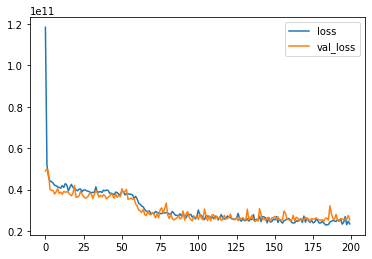

In [120]:
pd.DataFrame(hist2.history).plot()

In [121]:
preds= model2.predict(x_test)
r2_score(y_test, preds)

0.8205165345855433

# Model 3

In [180]:
tf.random.set_seed(42)

model3= keras.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(12,)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1,)
], name="model3")

model3.compile(optimizer=keras.optimizers.Adamax(0.01), loss="mean_squared_error")

callback= keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, min_delta=1000, mode="min")

hist3= model3.fit(x_train, y_train, epochs=200, validation_split=0.2, batch_size=128)

Epoch 1/200
108/108 [==============================] - 1s 9ms/step - loss: 197266440192.0000 - val_loss: 63959719936.0000
Epoch 2/200
108/108 [==============================] - 1s 6ms/step - loss: 71478435840.0000 - val_loss: 54451851264.0000
Epoch 3/200
108/108 [==============================] - 1s 6ms/step - loss: 61300588544.0000 - val_loss: 47953891328.0000
Epoch 4/200
108/108 [==============================] - 1s 6ms/step - loss: 53618270208.0000 - val_loss: 44820672512.0000
Epoch 5/200
108/108 [==============================] - 1s 6ms/step - loss: 49129484288.0000 - val_loss: 42202791936.0000
Epoch 6/200
108/108 [==============================] - 1s 7ms/step - loss: 48085639168.0000 - val_loss: 41565216768.0000
Epoch 7/200
108/108 [==============================] - 1s 6ms/step - loss: 45264936960.0000 - val_loss: 39768207360.0000
Epoch 8/200
108/108 [==============================] - 1s 7ms/step - loss: 43580473344.0000 - val_loss: 39103791104.0000
Epoch 9/200
108/108 [==========

<AxesSubplot:>

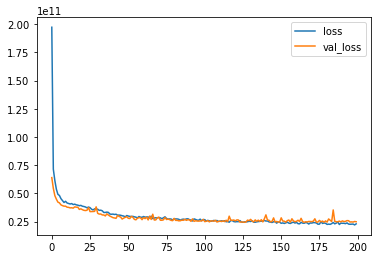

In [181]:
pd.DataFrame(hist3.history).plot()

In [182]:
preds= model3.predict(x_test)
r2_score(y_test, preds)

0.8309140162682676

In [183]:
model3.evaluate(x_test,y_test)

135/135 [==============================] - 0s 3ms/step - loss: 22017742848.0000


22017742848.0

# Model-4

In [243]:
tf.random.set_seed(42)

model4= keras.Sequential([
    keras.layers.Dense(32, activation="lelu", input_shape=(12,)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)
], name="model4")

model4.compile(optimizer=keras.optimizers.Adamax(0.01), loss="mean_squared_error")

callback= keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, min_delta=1000, mode="min")

hist4= model4.fit(x_train, y_train, epochs=200, validation_split=0.2, batch_size=64)

Epoch 1/200
216/216 [==============================] - 1s 7ms/step - loss: 136954257408.0000 - val_loss: 54082072576.0000
Epoch 2/200
216/216 [==============================] - 1s 5ms/step - loss: 59065839616.0000 - val_loss: 47202062336.0000
Epoch 3/200
216/216 [==============================] - 1s 5ms/step - loss: 51595132928.0000 - val_loss: 46869803008.0000
Epoch 4/200
216/216 [==============================] - 1s 5ms/step - loss: 47746686976.0000 - val_loss: 40358965248.0000
Epoch 5/200
216/216 [==============================] - 1s 5ms/step - loss: 47785840640.0000 - val_loss: 42163695616.0000
Epoch 6/200
216/216 [==============================] - 1s 5ms/step - loss: 46259892224.0000 - val_loss: 38759784448.0000
Epoch 7/200
216/216 [==============================] - 1s 5ms/step - loss: 45807484928.0000 - val_loss: 38311690240.0000
Epoch 8/200
216/216 [==============================] - 1s 4ms/step - loss: 43782684672.0000 - val_loss: 39215493120.0000
Epoch 9/200
216/216 [==========

<AxesSubplot:>

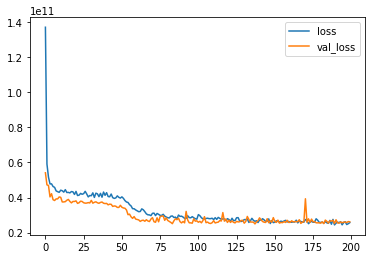

In [244]:
pd.DataFrame(hist4.history).plot()

In [245]:
preds= model4.predict(x_test)
r2_score(y_test, preds)

0.821788040652429

# Taking all the features

In [275]:
x= data.drop("price", axis=1)
y= data.price

x.shape, y.shape

((21597, 19), (21597,))

In [276]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [277]:
from sklearn.preprocessing import MinMaxScaler 

scaler= MinMaxScaler()

x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)


scaler= MinMaxScaler()

y_train= scaler.fit_transform(y_train.to_frame()).ravel()
y_test= scaler.transform(y_test.to_frame()).ravel()

y_train.shape, y_test.shape

((17277,), (4320,))

In [278]:
tf.random.set_seed(42)

model5= keras.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(19,)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1,)
], name="model5")

model5.compile(optimizer=keras.optimizers.Adamax(0.01), loss="mean_squared_error")

callback= keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, min_delta=1000, mode="min")

hist5= model5.fit(x_train, y_train, epochs=200, validation_split=0.2, batch_size=128)

Epoch 1/200
108/108 [==============================] - 1s 9ms/step - loss: 0.0235 - val_loss: 9.9962e-04
Epoch 2/200
108/108 [==============================] - 1s 6ms/step - loss: 9.8895e-04 - val_loss: 6.7164e-04
Epoch 3/200
108/108 [==============================] - 1s 6ms/step - loss: 8.0424e-04 - val_loss: 5.9015e-04
Epoch 4/200
108/108 [==============================] - 1s 6ms/step - loss: 6.8983e-04 - val_loss: 5.3397e-04
Epoch 5/200
108/108 [==============================] - 1s 5ms/step - loss: 6.9025e-04 - val_loss: 6.0552e-04
Epoch 6/200
108/108 [==============================] - 1s 6ms/step - loss: 6.0860e-04 - val_loss: 6.5677e-04
Epoch 7/200
108/108 [==============================] - 1s 6ms/step - loss: 6.0131e-04 - val_loss: 4.8278e-04
Epoch 8/200
108/108 [==============================] - 1s 6ms/step - loss: 5.5162e-04 - val_loss: 5.0665e-04
Epoch 9/200
108/108 [==============================] - 1s 7ms/step - loss: 5.5312e-04 - val_loss: 4.2901e-04
Epoch 10/200
108/108 [=

<AxesSubplot:>

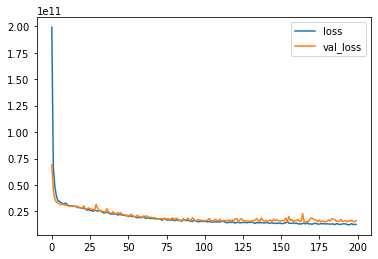

In [261]:
pd.DataFrame(hist5.history).plot()

In [262]:
preds= model5.predict(x_test)
r2_score(y_test, preds)

0.8711794547345866

In [263]:
model5.evaluate(x_test,y_test)

135/135 [==============================] - 0s 3ms/step - loss: 16774532096.0000


16774532096.0

## Model 6

In [282]:
tf.random.set_seed(42)

model6= keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(19,)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1,)
], name="model6")

model6.compile(optimizer=keras.optimizers.Adam(0.01), loss="mean_squared_error")


hist6= model6.fit(x_train, y_train, epochs=200, validation_split=0.2, batch_size=64)

Epoch 1/200
216/216 [==============================] - 1s 4ms/step - loss: 0.0079 - val_loss: 7.1903e-04
Epoch 2/200
216/216 [==============================] - 1s 3ms/step - loss: 8.7990e-04 - val_loss: 6.0250e-04
Epoch 3/200
216/216 [==============================] - 1s 3ms/step - loss: 7.0409e-04 - val_loss: 7.5398e-04
Epoch 4/200
216/216 [==============================] - 1s 3ms/step - loss: 7.2654e-04 - val_loss: 5.5317e-04
Epoch 5/200
216/216 [==============================] - 1s 3ms/step - loss: 6.6276e-04 - val_loss: 6.0824e-04
Epoch 6/200
216/216 [==============================] - 1s 3ms/step - loss: 6.2944e-04 - val_loss: 5.9774e-04
Epoch 7/200
216/216 [==============================] - 1s 3ms/step - loss: 6.4739e-04 - val_loss: 6.7810e-04
Epoch 8/200
216/216 [==============================] - 1s 3ms/step - loss: 6.3649e-04 - val_loss: 6.0286e-04
Epoch 9/200
216/216 [==============================] - 1s 3ms/step - loss: 6.3108e-04 - val_loss: 6.7629e-04
Epoch 10/200
216/216 [=

In [283]:
preds= model6.predict(x_test)
r2_score(y_test, preds)

0.8582566316120603

In [284]:
model6.evaluate(x_test,y_test)

135/135 [==============================] - 0s 3ms/step - loss: 3.1771e-04


0.0003177095204591751

# with Standard Scaler

In [295]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler 

scaler= MinMaxScaler()

x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)


scaler= MinMaxScaler()

y_train= scaler.fit_transform(y_train.to_frame()).ravel()
y_test= scaler.transform(y_test.to_frame()).ravel()

y_train.shape, y_test.shape

In [321]:
tf.random.set_seed(42)

model7= keras.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(19,)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1,)
], name="model7")

model7.compile(optimizer=keras.optimizers.Adamax(0.01), loss="mean_squared_error")

# callback= keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, min_delta=1000, mode="min")

hist7= model7.fit(x_train, y_train, epochs=200, validation_split=0.2, batch_size=64)

Epoch 1/200
216/216 [==============================] - 1s 5ms/step - loss: 148721451008.0000 - val_loss: 48152768512.0000
Epoch 2/200
216/216 [==============================] - 1s 4ms/step - loss: 52023328768.0000 - val_loss: 36889198592.0000
Epoch 3/200
216/216 [==============================] - 1s 4ms/step - loss: 41549291520.0000 - val_loss: 37517041664.0000
Epoch 4/200
216/216 [==============================] - 1s 4ms/step - loss: 39330832384.0000 - val_loss: 32390076416.0000
Epoch 5/200
216/216 [==============================] - 1s 4ms/step - loss: 37400838144.0000 - val_loss: 32162166784.0000
Epoch 6/200
216/216 [==============================] - 1s 4ms/step - loss: 35808886784.0000 - val_loss: 30417475584.0000
Epoch 7/200
216/216 [==============================] - 1s 4ms/step - loss: 35182817280.0000 - val_loss: 30401021952.0000
Epoch 8/200
216/216 [==============================] - 1s 4ms/step - loss: 34137376768.0000 - val_loss: 30491226112.0000
Epoch 9/200
216/216 [==========

<AxesSubplot:>

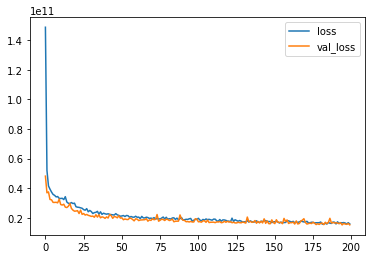

In [322]:
pd.DataFrame(hist7.history).plot()

In [323]:
preds= model7.predict(x_test)
r2_score(y_test, preds)

0.8846746141700152

In [324]:
model7.evaluate(x_test, y_test)

135/135 [==============================] - 0s 3ms/step - loss: 15017241600.0000


15017241600.0

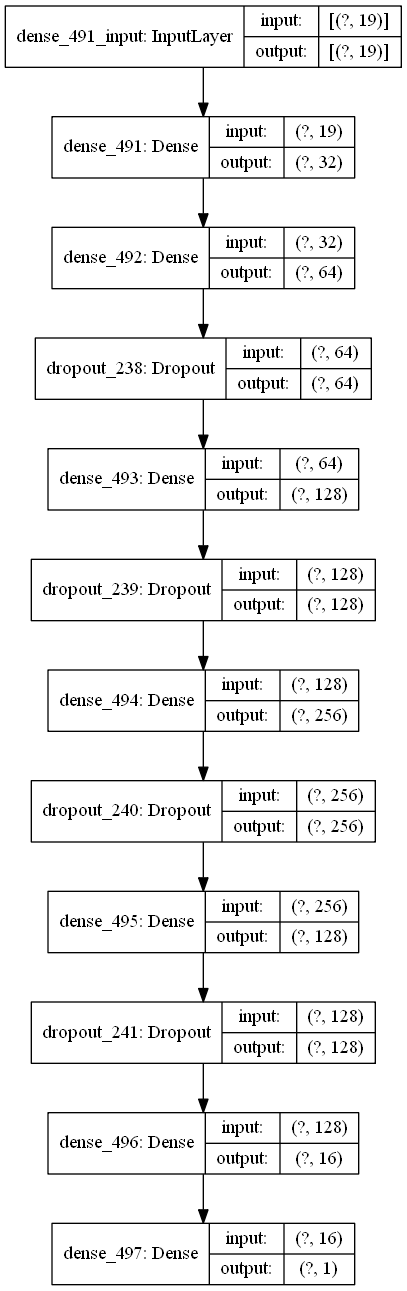

In [327]:
from tensorflow.keras.utils import plot_model

plot_model(model7,show_shapes=True)